In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
#from imblearn.over_sampling import SMOTE


In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
train.shape

(891, 12)

In [ ]:
train.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

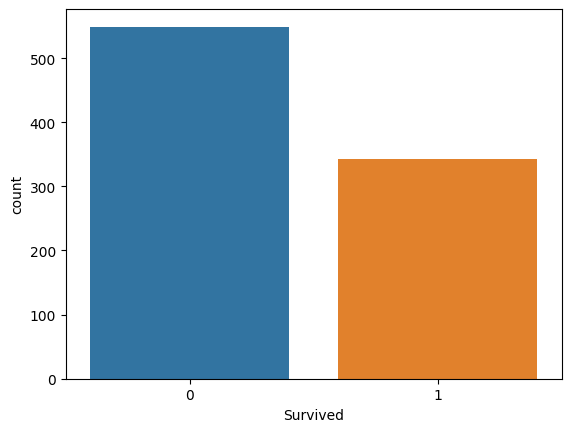

In [ ]:
sns.countplot(x=train['Survived'])

In [ ]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
train['Embarked'].mode()

0    S
Name: Embarked, dtype: object

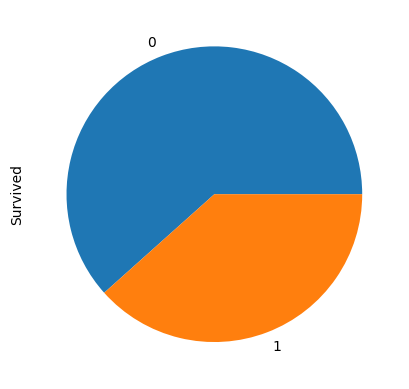

In [ ]:
train['Survived'].value_counts().plot.pie()
plt.show()

In [ ]:
train = train.drop(['Cabin', 'Ticket', 'PassengerId', 'Name'], axis=1)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
train['Age'].fillna(train['Age'].mean(), inplace= True)


In [ ]:
train.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0,'C':1,'Q': 2} }, inplace = True)

In [ ]:
X = train.drop('Survived', axis=1)
Y = train['Survived']
scalar = StandardScaler()
X_scale  = scalar.fit_transform(X)


In [ ]:
#x= X

In [ ]:
#smote=SMOTE(random_state=2)
#X_res , y_res=smote.fit_resample(X,Y)
#X_new=pd.DataFrame(X_res,columns=x.columns)
#y_new=pd.DataFrame(y_res,columns=['Survived'])

In [ ]:
X_train ,X_test, Y_train, Y_test = train_test_split(X_scale,Y, test_size=0.2,random_state=1)

model = LogisticRegression()
rf = RandomForestClassifier()

In [ ]:
rf.fit(X_train,Y_train)

<ipython-input-66-70917fd5b97b>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_train)


RandomForestClassifier()

In [ ]:
rf.score(X_test,Y_test)

0.8409090909090909

In [ ]:
model.fit(X_train, Y_train)



/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
model.score(X_test, Y_test)

0.759090909090909

In [ ]:
input_d = (1,0,25,2,0,88.00,0)
input_array = np.asarray(input_d)
input_data = input_array.reshape(1,-1)

In [ ]:
prediction = rf.predict(input_data)
print(prediction[0])
if prediction[0]==0:
    print("Dead")
if prediction[0]==1:
    print("Alive")

1
Alive


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
